In [1]:
import pandas as pd
import os
import numpy as np
import networkx as nx 
# from pyvis.network import Network

In [22]:
# read data
df_cate = pd.read_csv('./data/wikispeedia_paths-and-graph/categories.tsv', sep='\t', header=None, comment='#')
df_cate.head(5)

,0,1
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


In [3]:
novel_name = df_cate[df_cate[1]=='subject.Language_and_literature.Novels'][0]

In [4]:
print(pd.unique(novel_name))

['A_Christmas_Carol' 'A_Tale_of_a_Tub' 'A_Wrinkle_in_Time'
 'Alice%27s_Adventures_in_Wonderland' 'Anna_Karenina' 'Charlotte%27s_Web'
 'Crime_and_Punishment' 'David_Copperfield_%28novel%29' 'Frankenstein'
 'Harry_Potter' 'Howards_End' 'Jane_Eyre' 'Kidnapped_%28novel%29'
 'Little_Women' 'Nineteen_Eighty-Four' 'Oliver_Twist'
 'One_Flew_Over_the_Cuckoo%27s_Nest_%28novel%29' 'Oroonoko'
 'Pride_and_Prejudice' 'Private_Peaceful' 'Robinson_Crusoe'
 'Starship_Troopers' 'The_Brothers_Karamazov' 'The_Catcher_in_the_Rye'
 'The_Count_of_Monte_Cristo'
 'The_Curious_Incident_of_the_Dog_in_the_Night-time'
 'The_Hitchhiker%27s_Guide_to_the_Galaxy' 'The_Hobbit'
 'The_Lion%2C_the_Witch_and_the_Wardrobe' 'The_Lorax'
 'The_Lord_of_the_Rings' 'The_Old_Man_and_the_Sea' 'The_Oz_books'
 'The_Picture_of_Dorian_Gray' 'The_Pilgrim%27s_Progress'
 'To_Kill_a_Mockingbird' 'Treasure_Island' 'War_and_Peace' 'Wolf_Brother']


In [5]:
#conda install -c conda-forge graph-tool
#conda install -c conda-forge rdflib

In [25]:
df_finished_path = pd.read_csv('./data/wikispeedia_paths-and-graph/paths_finished2.tsv', sep='\t') # paths_finished.tsv without comment
df_finished_path.head(5)

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [29]:
df_finished_path.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42323 entries, 0 to 51317
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  42321 non-null  object 
 1   timestamp        42323 non-null  int64  
 2   durationInSec    42323 non-null  int64  
 3   path             42323 non-null  object 
 4   rating           23566 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ MB


In [33]:
# delete paths contain "back/<"
df_finished_path = df_finished_path[df_finished_path["path"].str.contains("<")==False] # user has backtracked, around 30 records affected
df_contain_hp = df_finished_path[df_finished_path["path"].str.contains("Harry_Potter")==True]
df_contain_hp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 3427 to 51039
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  142 non-null    object 
 1   timestamp        142 non-null    int64  
 2   durationInSec    142 non-null    int64  
 3   path             142 non-null    object 
 4   rating           73 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


In [34]:
df_contain_tlotr = df_finished_path[df_finished_path["path"].str.contains("The_Lord_of_the_Rings")==True]
df_contain_tlotr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 3800 to 50963
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  97 non-null     object 
 1   timestamp        97 non-null     int64  
 2   durationInSec    97 non-null     int64  
 3   path             97 non-null     object 
 4   rating           57 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.5+ KB


In [35]:
df_contain_hp['path_list'] = df_contain_hp['path'].apply(lambda x: x.split(';'))
df_contain_hp.head()
#type(df_contain_hp['path_list'].iloc[0])

/tmp/ipykernel_203/2346087000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_contain_hp['path_list'] = df_contain_hp['path'].apply(lambda x: x.split(';'))


,hashedIpAddress,timestamp,durationInSec,path,rating,path_list
3427,38b72461354df0ea,1342750568,154,Computer;Microsoft_Windows;Macintosh;IPod;Harr...,NaN,"[Computer, Microsoft_Windows, Macintosh, IPod,..."
3475,0dc01723302f07b0,1351583335,134,Computer;Great_Britain;United_Kingdom;J._K._Ro...,NaN,"[Computer, Great_Britain, United_Kingdom, J._K..."
3476,75bd20c663d02c8f,1365540114,97,Computer;Television;Film;Visual_arts;United_Ki...,NaN,"[Computer, Television, Film, Visual_arts, Unit..."
3477,26ac74e94d324e45,1366979755,70,Computer;Great_Britain;United_Kingdom;J._K._Ro...,2.0,"[Computer, Great_Britain, United_Kingdom, J._K..."
4321,1e554e84576292b0,1248892784,75,England;United_Kingdom;J._K._Rowling;Harry_Potter,1.0,"[England, United_Kingdom, J._K._Rowling, Harry..."


In [36]:
df_contain_hp['path_list'].iloc[0]

['Computer',
 'Microsoft_Windows',
 'Macintosh',
 'IPod',
 'Harry_Potter',
 'Owl',
 'Insect',
 'Bee',
 'Honey',
 'Sugar',
 'Food',
 'Scurvy',
 'Fruit']

In [79]:
# exact graph structure

graph_hp = nx.Graph()

name_mapping = {}
inverse_name_mapping = {}
name_idx = 0
for i in range(0, len(df_contain_hp)):
    len_path = len(df_contain_hp['path_list'].iloc[i])
    for j in range(0, len_path):
        name = df_contain_hp['path_list'].iloc[i][j]
        # print(name)
        if name not in name_mapping:
            name_mapping[name] = name_idx
            inverse_name_mapping[name_idx] = name
            graph_hp.add_node(name_idx, name=name)
            name_idx += 1
            
for i in range(0, len(df_contain_hp)):
    len_path = len(df_contain_hp['path_list'].iloc[i])
    n_nodes = n_nodes + len_path
    for j in range(0, len_path - 1):
        name_from=df_contain_hp['path_list'].iloc[i][j]
        name_to=df_contain_hp['path_list'].iloc[i][j + 1]
        graph_hp.add_edge(name_mapping[name_from], name_mapping[name_to], weight=1.0)

# print(name_mapping)
# graph_hp_degree = dict(graph_hp.degree)
# print(graph_hp_degree)
for key, value in graph_hp_degree.items():
    if value >= 10:
        print(inverse_name_mapping[key], '->', value)

Harry_Potter -> 30
United_Kingdom -> 38
England -> 10
London -> 10
Europe -> 10
English_language -> 10
United_States -> 26
Australia -> 14


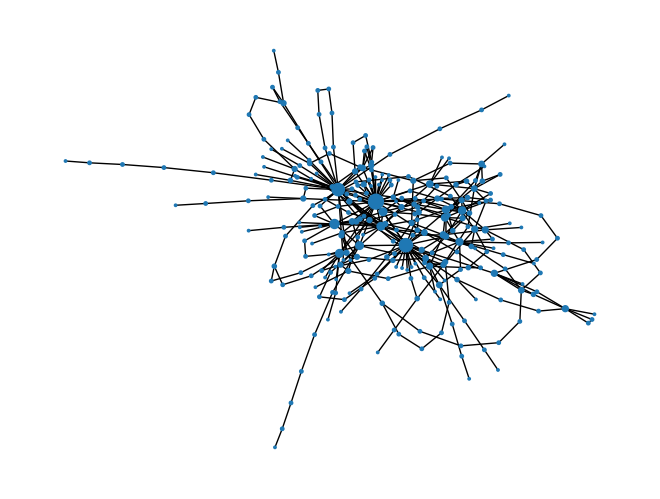

In [70]:
nx.draw(graph_hp, node_size=[v * 3 for v in graph_hp_degree.values()])

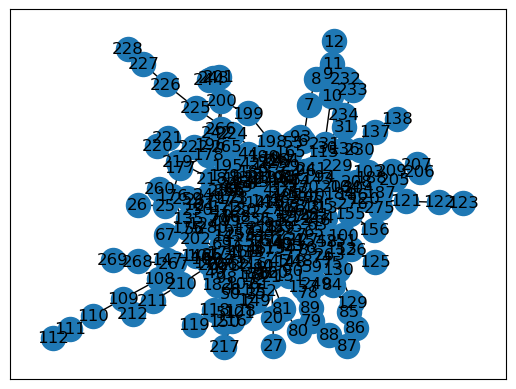

In [58]:
nx.draw_networkx(graph_hp)

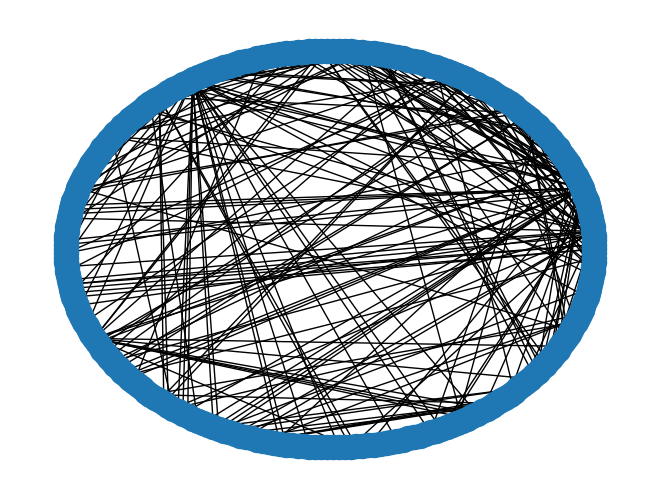

In [59]:
nx.draw_circular(graph_hp)

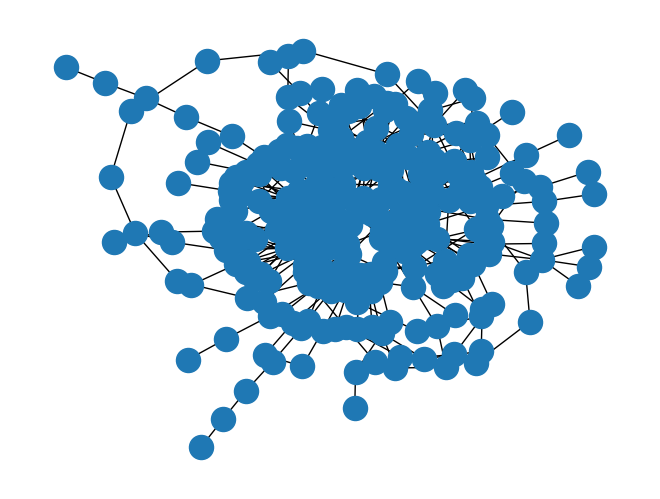

In [60]:
nx.draw_kamada_kawai(graph_hp)

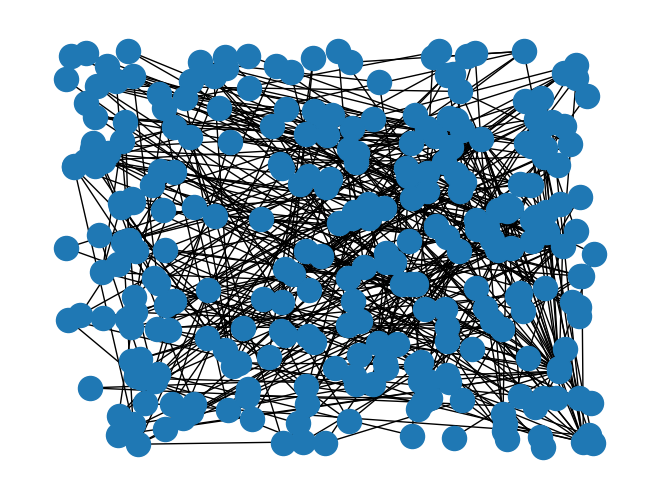

In [48]:
nx.draw_random(graph_hp)

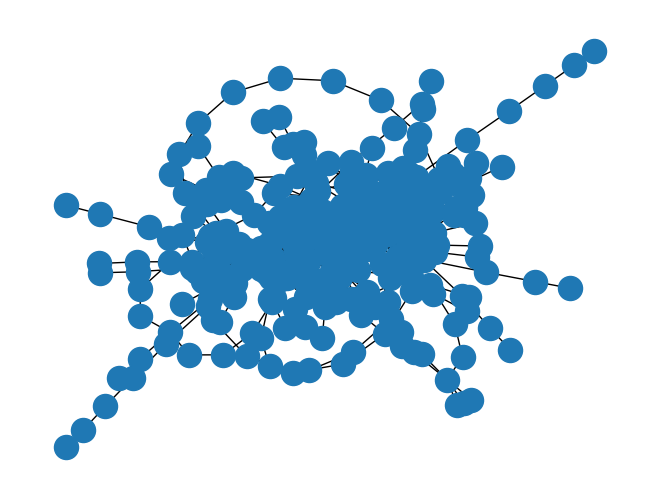

In [61]:
nx.draw_spring(graph_hp)

In [19]:
# interactive visualization
#net = Network(notebook=True)
#net.from_nx(G)
#net.show("example.html")

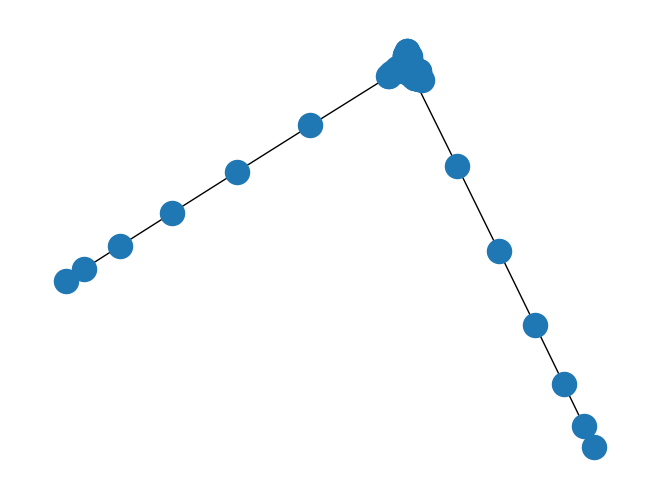

In [62]:
nx.draw(graph_hp,nx.spectral_layout(graph_hp))

In [53]:
# nx.spectral_layout(graph_hp)

In [63]:
nx.clustering(graph_hp)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0.01839080459770115,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0.031294452347083924,
 15: 0.3333333333333333,
 16: 0,
 17: 0.08333333333333333,
 18: 0,
 19: 0.13333333333333333,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0.1111111111111111,
 34: 0.17857142857142858,
 35: 0.16666666666666666,
 36: 0.5,
 37: 0.13333333333333333,
 38: 0,
 39: 0.3333333333333333,
 40: 0,
 41: 0.1,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0.13333333333333333,
 47: 0.1,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0.06666666666666667,
 53: 0,
 54: 0,
 55: 0,
 56: 0.3333333333333333,
 57: 0.6666666666666666,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0.03571428571428571,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0.16666666666666666,
 71: 0.4,
 72: 0.08888888888888889,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0.16666666666666666,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 8